<a href="https://colab.research.google.com/github/rladbstj56/2024PythonDataAnalysis/blob/main/241017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

x = np.array([174, 152, 160, 137, 180]) # 1차원 배열이라 에러남
y = np.array([71, 55, 46, 40, 85])
x = x.reshape(-1, 1) # 2차원 배열로 reshape

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

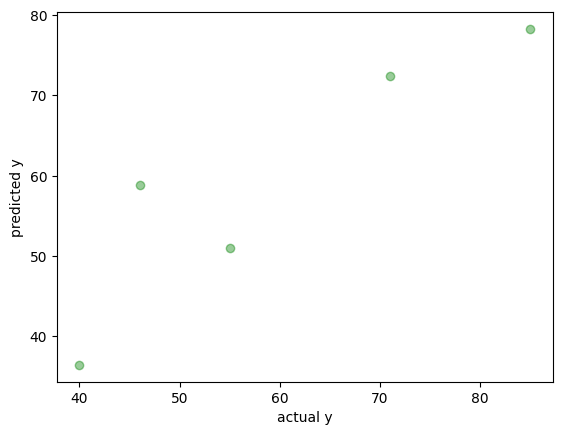

In [4]:
from sklearn.linear_model import LinearRegression
x_data = x
y_data = y
model = LinearRegression()
model.fit(x_data, y_data) # 모든 데이터에 대해 학습 -> 회귀 방정식 나옴

y_pred = model.predict(x_data) # x가 나왔을 때 y가 뭐가 나올지 예측
plt.scatter(y_data, y_pred, alpha=0.4, c='g')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show

In [5]:
from sklearn.metrics import mean_squared_error

print(model.score(x_data, y_data)) # 학습 점수
print(mean_squared_error(y_data, y_pred)) # 평균제곱오차

0.8242239173115635
47.99390161725069


In [6]:
print(model.predict([[165]])) # x=165에 대한 y값 예측

[63.68362534]


In [7]:
print(model.coef_) # 기울기(w)
print(model.intercept_) # 절편(b)
print(model.score(x_data, y_data)) # 정확도

[0.97355121]
-96.95232479784363
0.8242239173115635


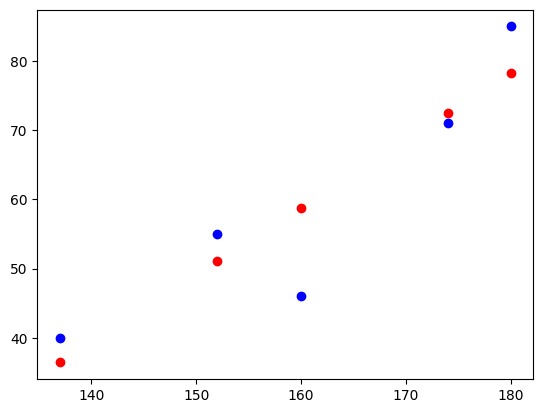

In [8]:
plt.scatter(x_data, y_data, c='b')
plt.scatter(x_data, y_pred, color='r')
plt.show()

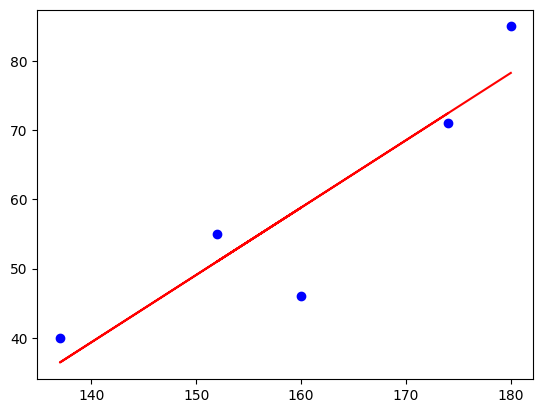

In [9]:
plt.scatter(x_data, y_data, c='b')
plt.plot(x_data, y_pred, color='r')
plt.show()

In [10]:
x2 = np.array([2, 4, 6, 8, 10, 12])
y2 = np.array([68.4, 67.3, 65.4, 65.2, 64.9, 64.6])
x2 = x2.reshape(-1, 1) # 2차원 배열로 reshape
y2 = y2.reshape(-1, 1) # y도 2차원 배열로 reshape

x2_data = x2
y2_data = y2

model2 = LinearRegression()
model2.fit(x2_data, y2_data)

y2_pred = model2.predict(x2_data)

print(model2.score(x2_data, y2_data))
print(mean_squared_error(y2_data, y2_pred))

0.8573396752501242
0.276126984126982


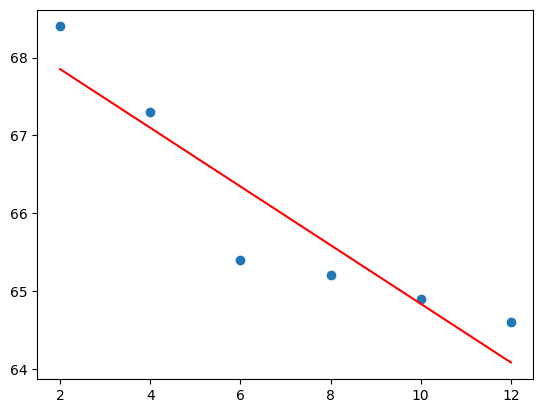

In [11]:
plt.scatter(x2_data, y2_data)
plt.plot(x2_data, y2_pred, color='r')
plt.show()

In [ ]:
print(model2.coef_)
print(model2.intercept_)

[[-0.37714286]]
[68.60666667]


In [ ]:
print(model2.score(x_data, y_data))
print(model2.predict([[5]]))

-10.424250426374309
[[66.72095238]]


In [12]:
adv = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


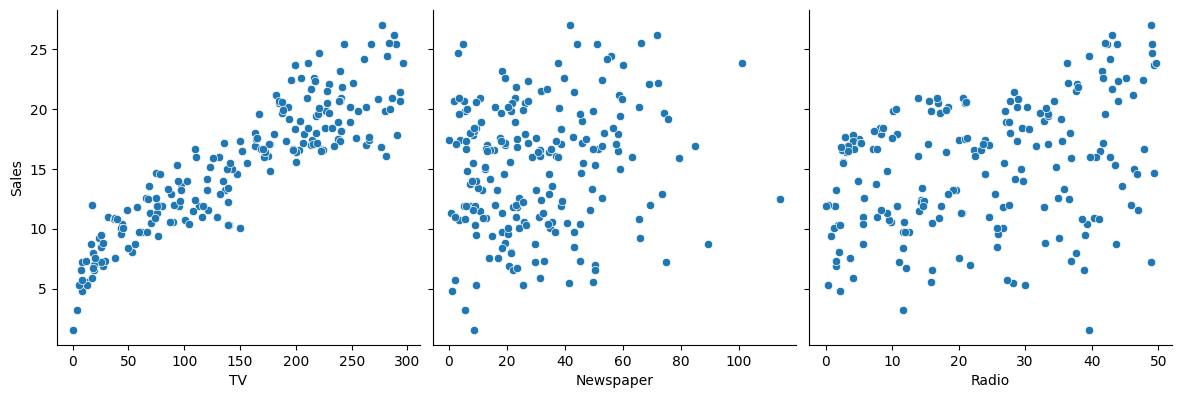

In [13]:
sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars = ['Sales'], height = 4)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

boston = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


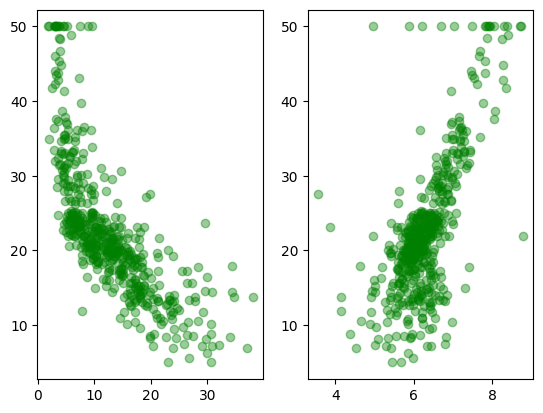

In [18]:
plt.subplot(1,2,1)
plt.scatter(boston[['LSTAT']], boston[['Target']], alpha = 0.4, c = 'g') # 하위 계층 비율, Price
plt.subplot(1,2,2)
plt.scatter(boston[['RM']], boston[['Target']], alpha = 0.4, c='g') # 방 개수, Price
plt.show()

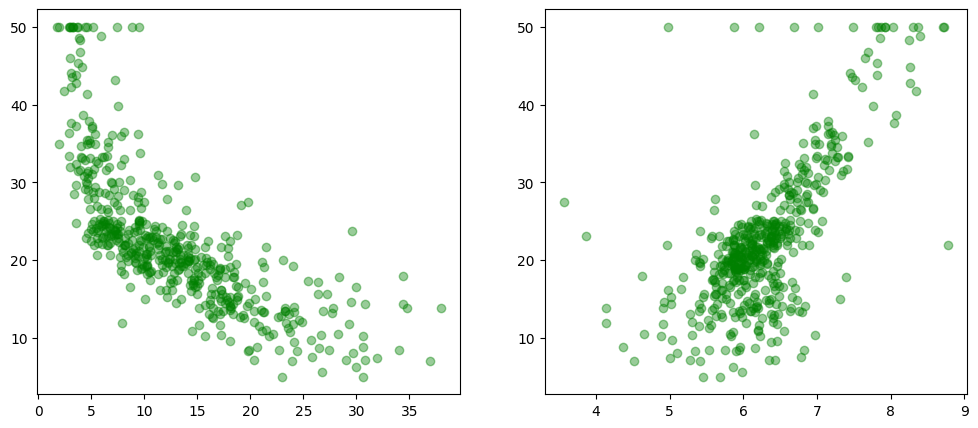

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].scatter(boston[['LSTAT']], boston[['Target']], alpha = 0.4, c = 'g')
axs[1].scatter(boston[['RM']], boston[['Target']], alpha = 0.4, c='g')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xb = boston[['CRIM', 'RM', 'LSTAT', 'AGE']]
yb = boston[['Target']]
xb_train, xb_test, yb_train, yb_test = train_test_split(xb, yb, test_size=0.2, random_state = 42) # 20%

model3 = LinearRegression()
model3.fit(xb_train, yb_train) # 훈련 데이터로 훈련

yb_pred = model3.predict(xb_test)

print(model3.score(xb_train, yb_train))
print(model3.coef_)
print(model3.intercept_)

0.6633348861314413
[[-0.1298062   5.45294513 -0.60480624  0.0171971 ]]
[-4.81987406]


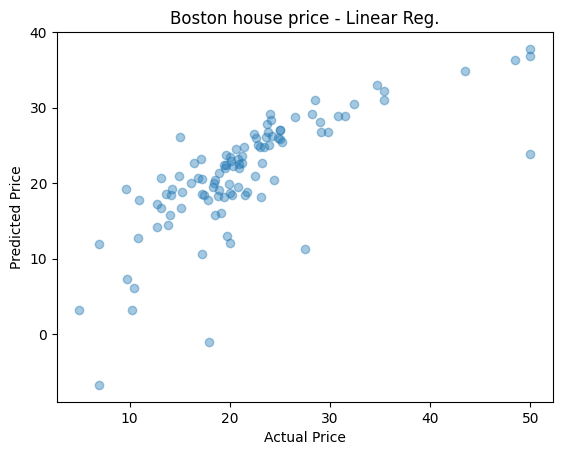

In [ ]:
plt.scatter(yb_test, yb_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Boston house price - Linear Reg.")
plt.show()

In [ ]:
grade = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/grade.csv')

grade.head()

,id,mid_test,final_test,hw1,hw2,grade
0,30,81,100,97,94,95
1,37,99,95,100,100,95
2,51,97,88,100,100,95
3,54,80,92,100,100,95
4,3,70,82,97,100,90


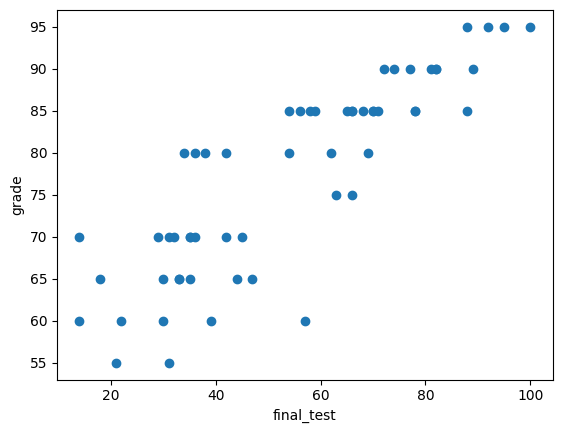

In [ ]:
xgrade = grade[['mid_test', 'final_test', 'hw1', 'hw2']]
ygrade = grade[['grade']]

plt.scatter(grade[['final_test']], grade['grade'])
plt.xlabel('final_test')
plt.ylabel('grade')
plt.show()

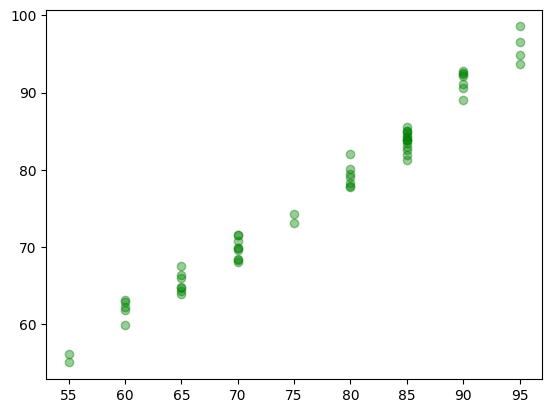

0.9780510705812493
[[76.79579716]]
2.8123543604265713


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
model4 = LinearRegression()
model4.fit(xgrade, ygrade)
ygrade_pred = model4.predict(xgrade)
plt.scatter(ygrade, ygrade_pred, alpha = 0.4, c='g')
plt.show()

from sklearn.metrics import mean_squared_error

print(model4.score(xgrade, ygrade))
print(model4.predict([[65,50,70,80]]))
print(mean_squared_error(ygrade,ygrade_pred))